# Exploring Storm Data 2013 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Importing storm data from a csv file

In [2]:
storm_file_path = "...StormEvents/StormEvents_2013.csv"
storm_data = pd.read_csv(storm_file_path)

Listing out columns in the pd dataframe

In [3]:
storm_data.columns

Index(['EpisodeID', 'Event_ID', 'State', 'Year', 'Month', 'Event_Type',
       'Begin_Date_Time', 'Timezone', 'End_Date_Time', 'Injuries_Direct',
       'Injuries_Indirect', 'Deaths_Direct', 'Deaths_Indirect',
       'Damage_Property', 'Property_Cost', 'Damage_Crops', 'Crop_Cost',
       'Begin_Lat', 'Begin_Lon', 'End_Lat', 'End_Lon', 'Episode_Narrative',
       'Event_Narrative'],
      dtype='object')

Now we shall only use the columns we will be needing in our exploration

In [4]:
cols = ['State', 'Year', 'Month', 'Event_Type', 'Injuries_Direct','Injuries_Indirect', 'Deaths_Direct', 'Deaths_Indirect','Damage_Property', 'Property_Cost', 'Damage_Crops', 'Crop_Cost', 'Episode_Narrative','Event_Narrative']

In [5]:
storm_data=storm_data[cols]

To count **the number of storms** month wise we will have to list the months in a sorted order.<br>
We shall be using simple bar plots in this scenario.

In [6]:
months = storm_data.Month.unique()
months = list(months)
months.sort()

Drawing a **bar plot**

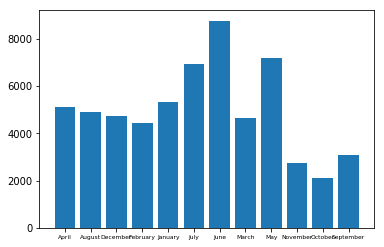

In [7]:
bar1 = storm_data.groupby(['Month']).size()
plt.bar(months, bar1,align='center')
plt.tick_params(axis="x", labelsize=6)
plt.show()

Similarly we can plot the **property damage cost** month-wise

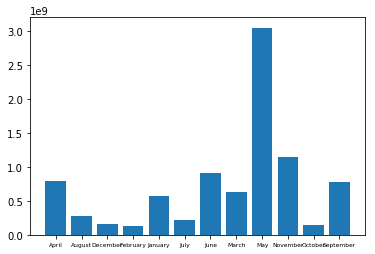

In [8]:
bar2 = storm_data[['Property_Cost', 'Month']].groupby(['Month']).sum().reset_index().sort_values(['Month',
        'Property_Cost'], ascending=[True, False])

plt.bar(bar2['Month'], bar2['Property_Cost'])
plt.tick_params(axis="x", labelsize=6)
plt.show()

**Crop damage cost** month-wise

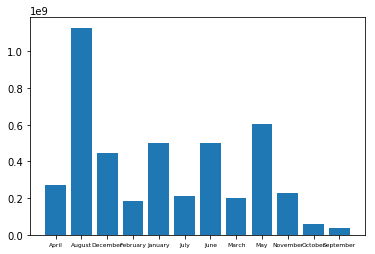

In [9]:
bar3 = storm_data[['Crop_Cost', 'Month']].groupby(['Month']).sum().reset_index().sort_values(['Month', 'Crop_Cost'],
                                                                                             ascending=[True, False])

plt.bar(bar3['Month'], bar3['Crop_Cost'])
plt.tick_params(axis="x", labelsize=6)
plt.show()

The sum total of property and crop damage done by the storms.<br>
For this purpose we need to add a new column to our dataframe.

In [10]:
total_cost=[]
l1=list(storm_data['Property_Cost'])
l2=list(storm_data['Crop_Cost'])
for i in range(len(list(storm_data['Property_Cost']))):
    total_cost.append(l1[i]+l2[i])

storm_data['Total_Cost'] = total_cost

**Plotting**

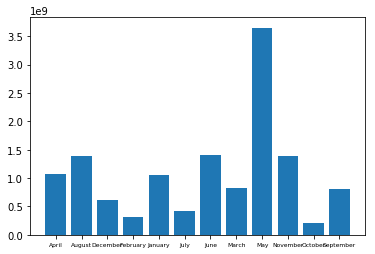

In [11]:
bar4 = storm_data[['Total_Cost', 'Month']].groupby(['Month']).sum().reset_index().sort_values(['Month',
                                    'Total_Cost'], ascending=[True,False])

plt.bar(bar4['Month'], bar4['Total_Cost'])
plt.tick_params(axis="x", labelsize=6)
plt.show()